# Project - EDA with Pandas Using the Boston Housing Data

## Introduction

In this section you've learned a lot about importing, cleaning up, analysing (using descriptive statistics) and visualizing data. In this more free form project you'll get a chance to practice all of these skills with the Boston Housing data set, which contains housing values in suburbs of Boston. The Boston Housing Data is commonly used by aspiring data scientists.

## Objectives

You will be able to:

* Load csv files using Pandas
* Find variables with high correlation
* Create box plots

# Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At minimum, this should include:

* Loading the data (which is stored in the file train.csv)
* Use built-in python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations using `.loc`, `.iloc` or related operations. Explain why you used the chosen subsets and do this for 3 possible 2-way splits. State how you think the 2 measures of centrality and/or dispersion might be different for each subset of the data. Examples of potential splits:
    - Create a 2 new dataframes based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't.
    - Create 2 new datagrames based on a certain split for crime rate.
* Next, use histograms and scatterplots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

# Variable Descriptions

This data frame contains the following columns:

#### crim  
per capita crime rate by town.

#### zn  
proportion of residential land zoned for lots over 25,000 sq.ft.

#### indus  
proportion of non-retail business acres per town.

#### chas  
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

#### nox  
nitrogen oxides concentration (parts per 10 million).

#### rm  
average number of rooms per dwelling.

#### age  
proportion of owner-occupied units built prior to 1940.

#### dis  
weighted mean of distances to five Boston employment centres.

#### rad  
index of accessibility to radial highways.

#### tax  
full-value property-tax rate per $10,000.

#### ptratio  
pupil-teacher ratio by town.

#### black  
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

#### lstat  
lower status of the population (percent).

#### medv  
median value of owner-occupied homes in $10000s.
  
  
  
Source
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

In [176]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

In [177]:
df = pd.read_csv('train.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [237]:
print(df.crim.describe())
print(df.crim.mode())
print(df.crim.median())
print(df.crim.mean())
print(df.ptratio.describe())
print(df.ptratio.mode())
print(df.lstat.describe())
print(df.lstat.mode())
# print(df.lstat.value_counts())
print(df.nox.describe())
print(df.indus.describe())
print(df.indus.unique())
print(df.indus.mode())
# print(df.indus.value_counts())

count    333.000000
mean       3.360341
std        7.352272
min        0.006320
25%        0.078960
50%        0.261690
75%        3.678220
max       73.534100
Name: crim, dtype: float64
0    0.01501
dtype: float64
0.26169000000000003
3.360341471471471
count    333.000000
mean      18.448048
std        2.151821
min       12.600000
25%       17.400000
50%       19.000000
75%       20.200000
max       21.200000
Name: ptratio, dtype: float64
0    20.2
dtype: float64
count    333.000000
mean      12.515435
std        7.067781
min        1.730000
25%        7.180000
50%       10.970000
75%       16.420000
max       37.970000
Name: lstat, dtype: float64
0    18.13
dtype: float64
count    333.000000
mean       0.557144
std        0.114955
min        0.385000
25%        0.453000
50%        0.538000
75%        0.631000
max        0.871000
Name: nox, dtype: float64
count    333.000000
mean      11.293483
std        6.998123
min        0.740000
25%        5.130000
50%        9.900000
75%       18

In [136]:
df.loc[df['crim'] >=0.261690, 'crime rate'] = 'above median'
df.loc[df['crim'] <0.261690, 'crime rate'] = 'below median'
df.loc[df['crim'] >=3.678220, 'crime rate'] = 'very high'
df.loc[df['crim'] <= 0.078960, 'crime rate'] = 'very low'
df.loc[df['lstat'] >= 12.5, 'lstat rate'] = 'above mean'
df.loc[df['lstat'] < 12.5, 'lstat rate'] = 'below mean'
df.loc[df['lstat'] >= 16, 'lstat rate'] = 'very high'
df.loc[df['lstat'] <= 7.18, 'lstat rate'] = 'very low'


I chose these subsets, to see the correlation between crime and low status in the population.  The crime rate seems is skewed, while most are below 10% per capita, some outliers pull the mean to the right of where the median and mode lie.  

In [138]:
cr = df.set_index('crim')
cr = cr.sort_values(by='crim', ascending=False)
cr = cr[['lstat', 'crime rate', 'lstat rate']]
cr.head()

,lstat,crime rate,lstat rate
crim,,,
73.5341,20.62,very high,very high
45.7461,36.98,very high,very high
38.3518,30.59,very high,very high
37.6619,14.52,very high,above mean
28.6558,20.08,very high,very high


<IPython.core.display.Javascript object>


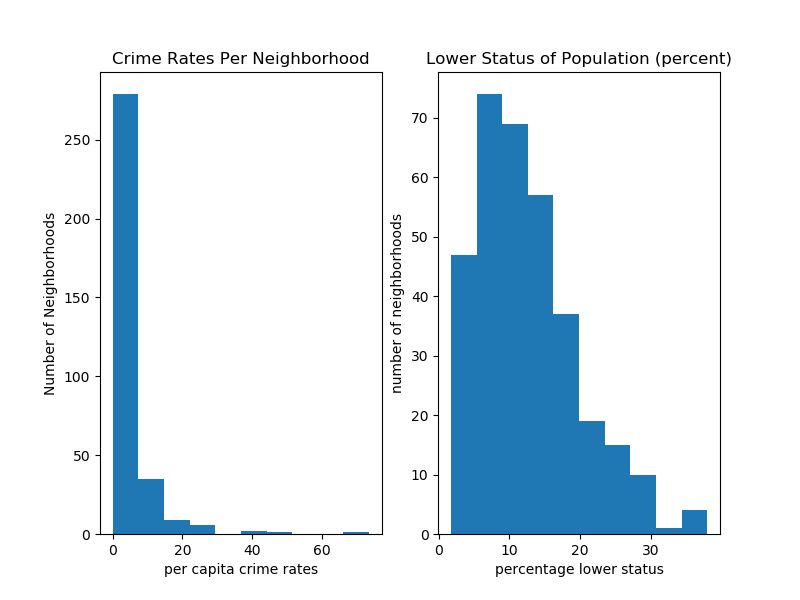

In [159]:
crime = plt.figure(figsize=(8,6))
ax = crime.add_subplot(121)
ax2 = crime.add_subplot(122)
x = df.crim
x2 = df.lstat
ax.hist(x)
ax2.hist(x2)
ax.set_xlabel('per capita crime rates'),ax.set_ylabel('Number of Neighborhoods'), ax.set_title('Crime Rates Per Neighborhood')
ax2.set_xlabel('percentage lower status'), ax2.set_ylabel('number of neighborhoods'), ax2.set_title('Lower Status of Population (percent)')

plt.show()

Most crime is below 10 per capita per neighborhood. The graph is skewed, the mean is pulled righ due to some outliers.  The lower population pattern follows a similar pattern, however it is less skewed as there are more ouliers.  It could be said, that there is a correlation between the two.  Lower status of population is related to higher crime rates, but it is not a rule as some places with a low status of pupulations have very low crime rates.

<IPython.core.display.Javascript object>


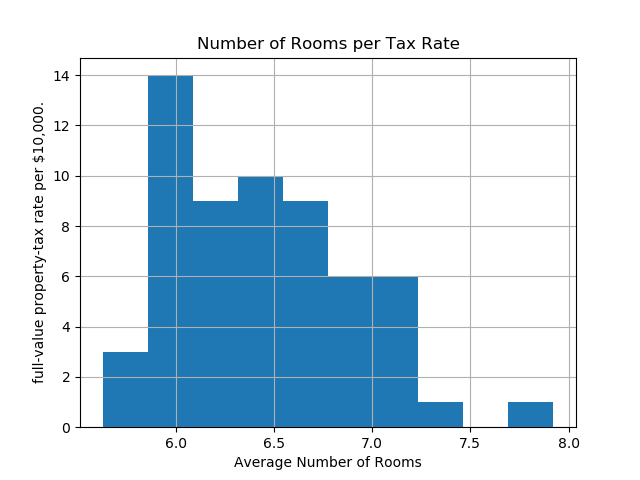

In [232]:
num_rooms = df.groupby('tax')['rm'].mean()
num_rooms.hist()
plt.xlabel('Average Number of Rooms')
plt.ylabel('full-value property-tax rate per $10,000.')
plt.title('Number of Rooms per Tax Rate')
plt.show()

In [230]:
tax = df.set_index('tax')
tax = tax.sort_values(by='tax', ascending=False)
tax = tax[['rm', 'zn', 'black']]
tax.head()

,rm,zn,black
tax,,,
711,5.093,0.0,318.43
711,5.983,0.0,390.11
711,5.983,0.0,396.90
711,5.454,0.0,395.09
666,6.081,0.0,396.90


this is also skewed. For the most part average houses have six rooms, regardless of tax value. Houses with the most 

<IPython.core.display.Javascript object>


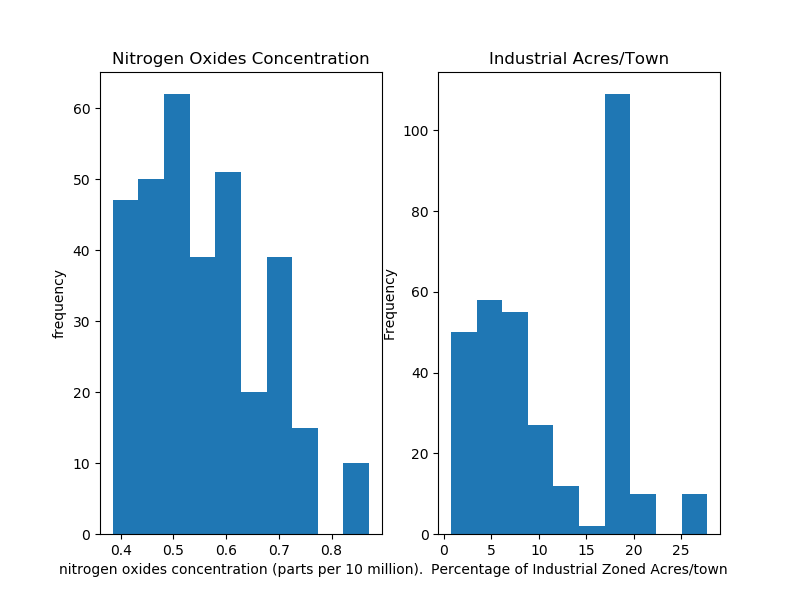

(Text(0.5, 0, 'Percentage of Industrial Zoned Acres/town'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Industrial Acres/Town'))

In [235]:
df.groupby('nox')['indus'].mean()
nox_level = df.nox
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
x = df.nox
x2 = df.indus
ax.hist(x)
ax2.hist(x2)
ax.set_xlabel('nitrogen oxides concentration (parts per 10 million).'),ax.set_ylabel('frequency'), ax.set_title('Nitrogen Oxides Concentration')
ax2.set_xlabel('Percentage of Industrial Zoned Acres/town'), ax2.set_ylabel('Frequency'), ax2.set_title('Industrial Acres/Town')



## Summary

Congratulations, you've completed your first "freeform" exploratory data analysis of a popular data set!